In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HousingData.csv')

In [3]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [4]:
# Check how many missing values are in each column
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill any NaN values with the mean of that column
df.fillna(df.mean(), inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Missing values after cleaning:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
# X is our 'question' data - all columns EXCEPT the price ('MEDV')
X = df.drop('MEDV', axis=1)

# y is our 'answer' data - ONLY the price ('MEDV') column
y = df['MEDV']

print("\nData has been successfully separated into Features (X) and Target (y).")


Data has been successfully separated into Features (X) and Target (y).


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 404 samples.
Testing set has 102 samples.


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Create a blank model
model = LinearRegression()

# 2. Train the model on the training data
model.fit(X_train, y_train)

# 3. Make predictions on the unseen test data
y_pred = model.predict(X_test)

# 4. Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Model Performance ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

--- Model Performance ---
Mean Squared Error (MSE): 25.02
R-squared Score: 0.66


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Create and train a new, more powerful model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate it
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest R-squared Score: {rf_r2:.2f}")

Random Forest R-squared Score: 0.89


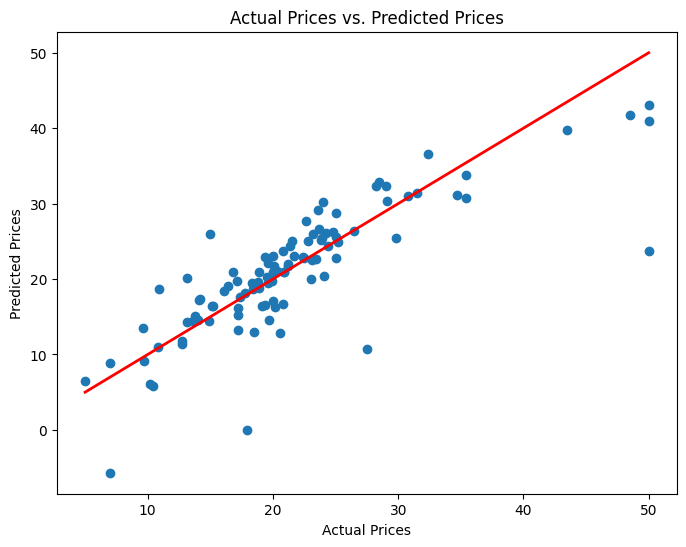

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2) # a perfect prediction line
plt.show()